In [1]:
import ast 
import pandas as pd
import seaborn as sns 

from datasets import load_dataset
import matplotlib.pyplot as plt 

c:\Users\91982\anaconda3\envs\project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

In [3]:
df_IN = df[(df['job_country']== 'India')]
df_IN=df_IN.copy()

In [4]:
import ast


df_IN['job_skills'] = df_IN['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [5]:
df_skills = df_IN.explode('job_skills').dropna(subset=['job_skills'])

In [6]:
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
16,Big Data Engineer,powershell
16,Big Data Engineer,python
16,Big Data Engineer,sql
16,Big Data Engineer,mysql
16,Big Data Engineer,sql server
...,...,...
785712,India - Collections Analyst II,flow
785716,Application Support Analyst,c#
785716,Application Support Analyst,sql
785740,AWS System Analyst,aws


In [7]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=df_skills_count.reset_index(name='skills_count')
df_skills_count.sort_values(by='skills_count', ascending=False , inplace=True)
df_skills_count

,job_skills,job_title_short,skills_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [8]:
type(df_skills_count)

pandas.core.frame.DataFrame

In [48]:
job_titles= df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

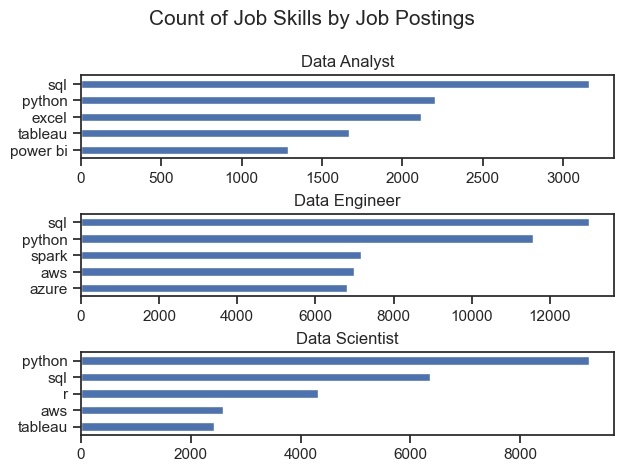

In [49]:
fig,ax= plt.subplots(len(job_titles),1)


for i,job_titles in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_titles].head(5)
    df_plot.plot(kind='barh' , x='job_skills', y='skills_count' , ax=ax[i] , title=job_titles)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    

fig.suptitle('Count of Job Skills by Job Postings',fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()

In [121]:
df_job_title_count =df_IN['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


In [122]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=df_skills_count.reset_index(name='skills_count')
df_skills_count.sort_values(by='skills_count', ascending=False , inplace=True)
df_skills_count

,job_skills,job_title_short,skills_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [123]:
df_skills_perc = pd.merge(df_skills_count ,df_job_title_count , how='left' , on= 'job_title_short')
df_skills_perc['skill_percent']= 100*df_skills_perc['skills_count']/df_skills_perc['jobs_total'] 
df_skills_perc


,job_skills,job_title_short,skills_count,jobs_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


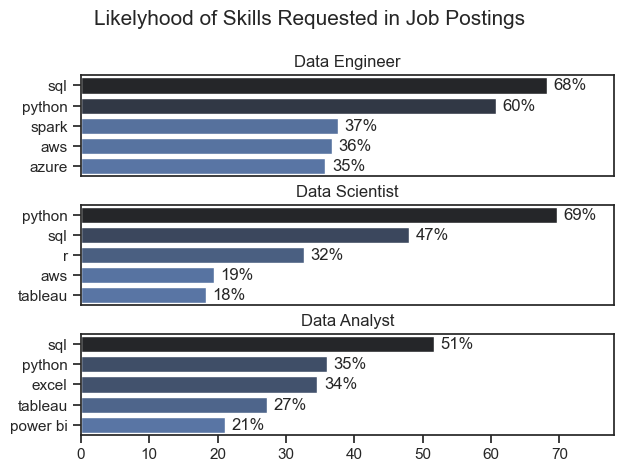

In [151]:
# Get all unique job titles from the dataframe
all_job_titles = df_skills_perc['job_title_short'].unique().tolist()

# Filter to include only the top 3 job titles
top_3_job_titles = df_skills_perc.groupby('job_title_short')['jobs_total'].sum().sort_values(ascending=False).head(3).index.tolist()
all_job_titles = top_3_job_titles


fig, ax = plt.subplots(len(all_job_titles), 1)

# Ensure ax is always an iterable list of axes objects
if len(all_job_titles) == 1:
    ax = [ax]

for i, job_title in enumerate(all_job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot , x='skill_percent' , y='job_skills' , ax=ax[i], hue='skill_percent' ,palette='dark:b_r')


    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)
    ax[i].set_title(job_title)

    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1 ,n, f'{int(v):.0f}%' , va='center')

    if i!= len (all_job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelyhood of Skills Requested in Job Postings ', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()